In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
gid="1I3kjmHBuHHSjb3638ieXg69Sagpxs3zaThIymRGTjC4"
gn="2_year_dataset"
gurl = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gid,gn)
ds=pd.read_csv(gurl)

In [3]:
ds


,id,bin_0,bin_3,nom_0,target
0,0,0,Y,Green,0
1,1,0,Y,Green,0
2,2,0,Y,Blue,0
3,3,0,Y,Red,1
4,4,0,N,Red,0
...,...,...,...,...,...
299995,299995,0,N,Red,0
299996,299996,0,Y,Green,0
299997,299997,0,Y,Blue,1
299998,299998,0,Y,Green,1


In [4]:
print(ds.nom_0=="NaN")

0         False
1         False
2         False
3         False
4         False
          ...  
299995    False
299996    False
299997    False
299998    False
299999    False
Name: nom_0, Length: 300000, dtype: bool


In [5]:
#dict{'Y':1,'N':0,'Red':0,'Green':1,'Blue':2}
ds['bin_3']=[0 if x=='N' else 1 for x in ds['bin_3']]
ds['nom_0']=[0 if x=='Red' else 1 if x=='Green' else 2  for x in ds['nom_0']]
#ds['nom_0']=[1 if x=='Green'for x in ds['nom_0']]
print(ds.head(20))

    id  bin_0  bin_3  nom_0  target
0    0      0      1      1       0
1    1      0      1      1       0
2    2      0      1      2       0
3    3      0      1      0       1
4    4      0      0      0       0
5    5      0      0      2       0
6    6      0      0      1       0
7    7      1      1      0       0
8    8      1      1      2       0
9    9      0      1      0       0
10  10      0      1      1       0
11  11      0      1      2       0
12  12      0      0      1       1
13  13      1      1      2       1
14  14      0      1      2       0
15  15      0      0      1       1
16  16      0      0      0       0
17  17      0      1      1       1
18  18      0      0      2       0
19  19      0      0      0       0


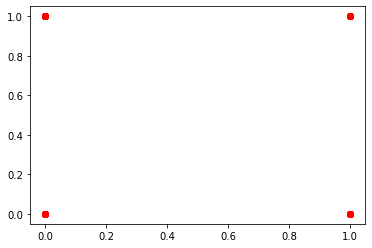

In [6]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(ds.bin_0,ds.target,'ro')
plt.show()

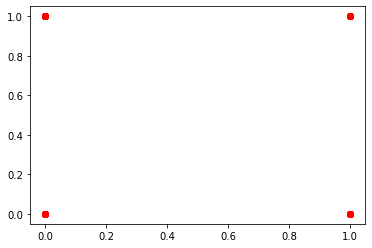

In [7]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(ds.bin_3,ds.target,'ro')
plt.show()

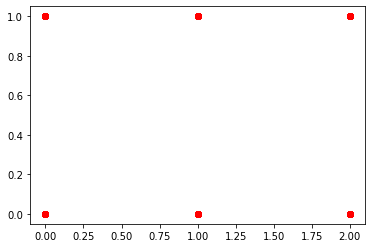

In [8]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(ds.nom_0,ds.target,'ro')
plt.show()

In [9]:
x_train,x_test,y_train,y_test = train_test_split(ds[['bin_0','bin_3','nom_0']],ds.target,test_size=0.2)

In [10]:
reg=linear_model.LogisticRegression()
reg.fit(x_train,y_train)
a=reg.score(x_test,y_test)

In [11]:
reg=RandomForestClassifier(random_state=0)
reg.fit(x_train,y_train)
b=reg.score(x_test,y_test)

In [12]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
c = decision_tree.score(x_test, y_test)


NameError: name 'decision_tree' is not defined

In [ ]:
print('Logistic Reg: {}'.format(a))
print('Random ForestClassifier: {}'.format(b))
print('Decision tree: {}'.format(c))